# do some stuffs for mnist dataset

## visualize distribution of clients

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os

In [37]:
def draw_distribution(data, axis, filename):
    profile = np.zeros((10,2))
    profile[:,0] = range(10)
    for key in data.keys():
        profile[int(key),1] = len(data[key])
    axis.bar(x=profile[:,0], height=profile[:,1])
    # axis.set_title(list(data.keys()))
    axis.set_title(filename)

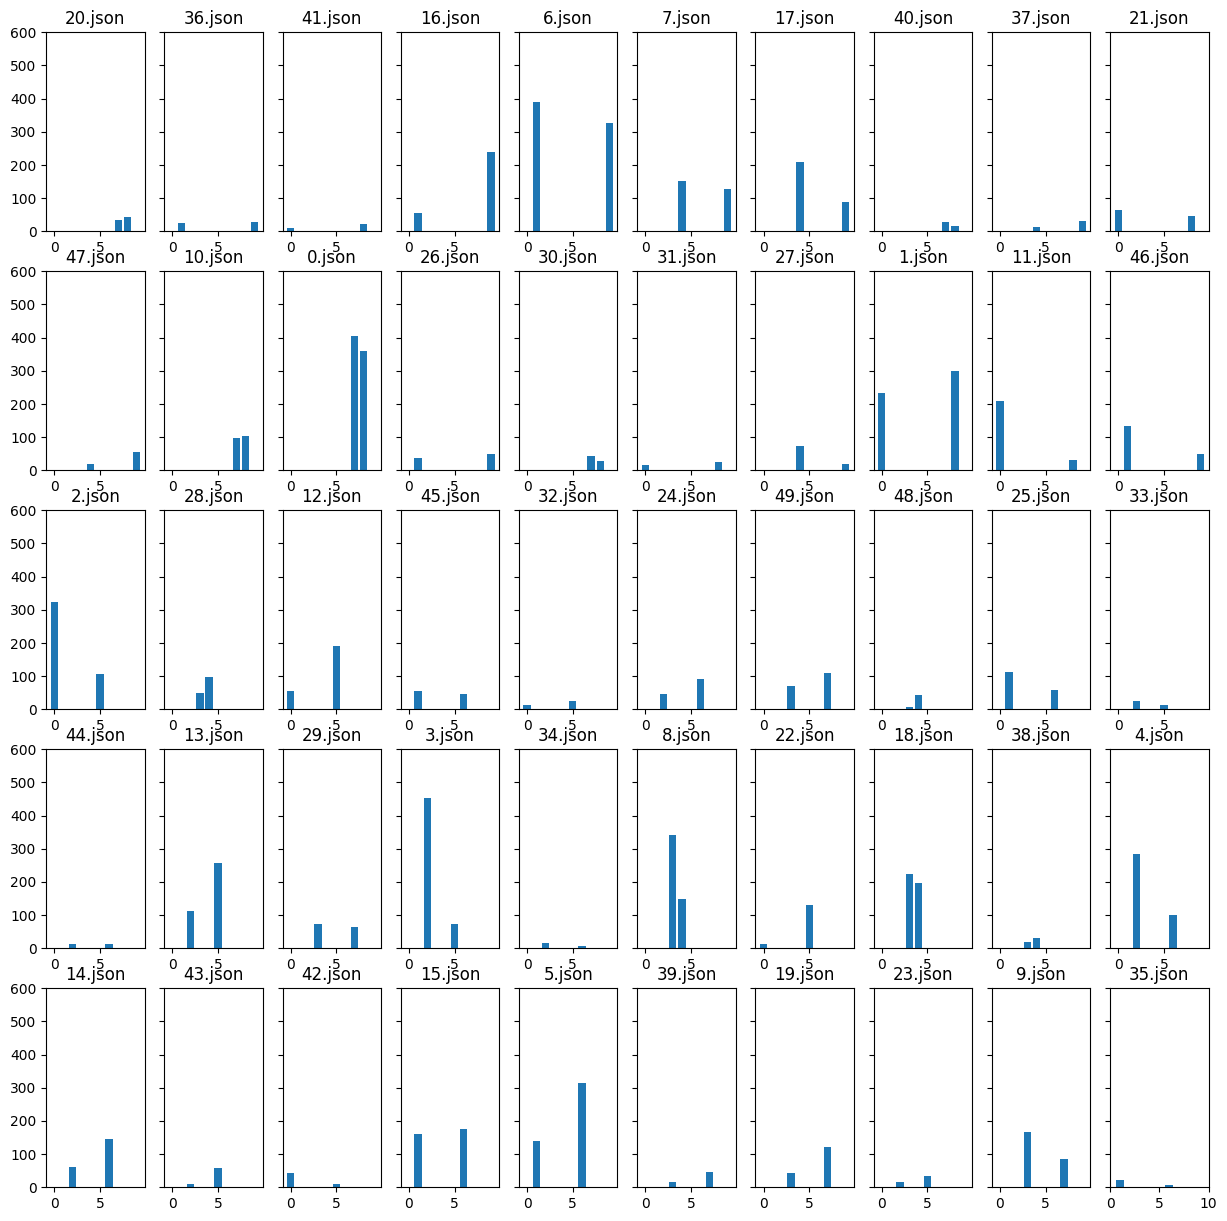

In [38]:
dir = './/client_test/'
fig, axis = plt.subplots(nrows=5, ncols=10, figsize=(15, 15), sharey=True)
fig.subplots_adjust(hspace=0.2)
plt.xlim([0, 10])
plt.ylim([0, 600])

for idx, file in enumerate(os.listdir(dir)):
    with open(os.path.join(dir, file), 'r') as fi:
        data = json.load(fi)
    draw_distribution(data, axis.flat[idx], file)

---

## test mnist loader

In [5]:
from data.loader.mnist_loader import get_loader
import matplotlib.pyplot as plt

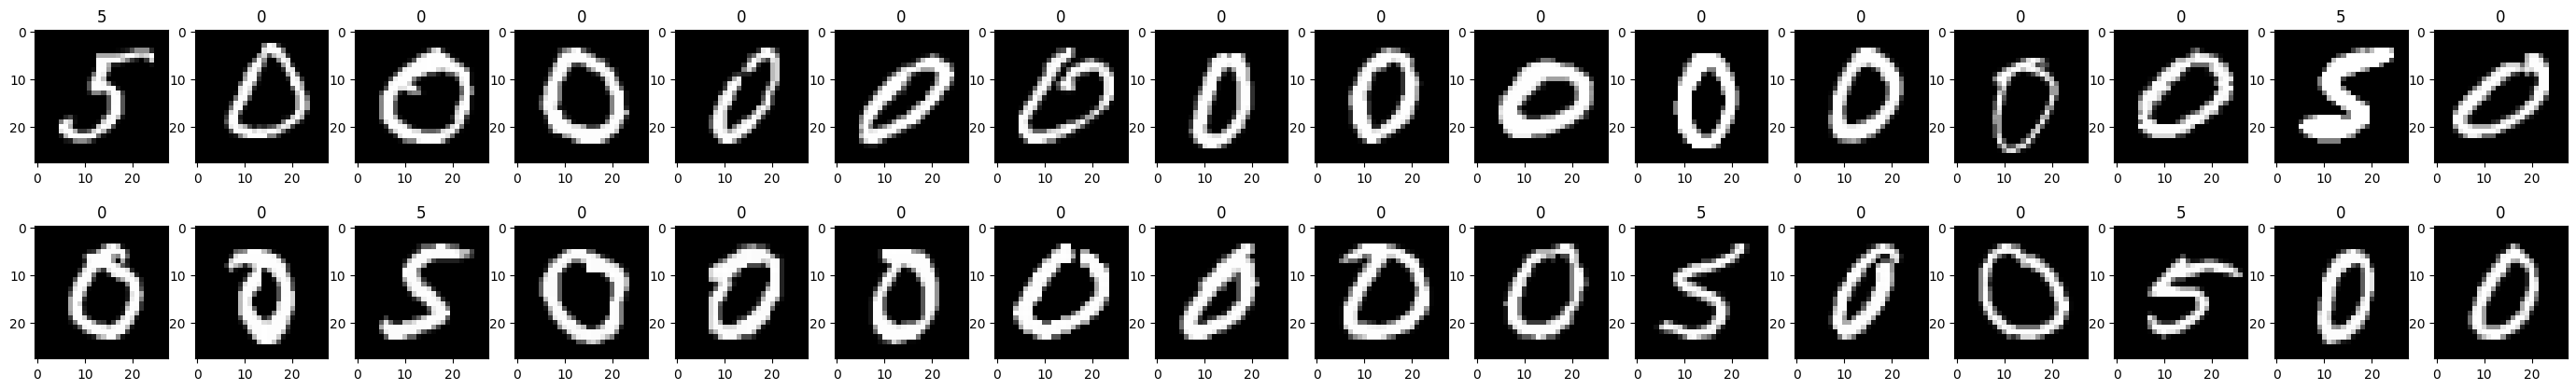

In [6]:
fig, axs = plt.subplots(nrows=2, ncols=16, figsize=(35,5))
count = 0
fig.subplots_adjust(hspace=0.2)

loader = get_loader('./data/mnist/client_test/2.json')
for batch in loader:
    for x, y in zip(batch[0], batch[1]):
        axs.flat[count].imshow(x.reshape((28,28)), cmap='gray')
        axs.flat[count].set_title(int(y))
        count += 1
    break

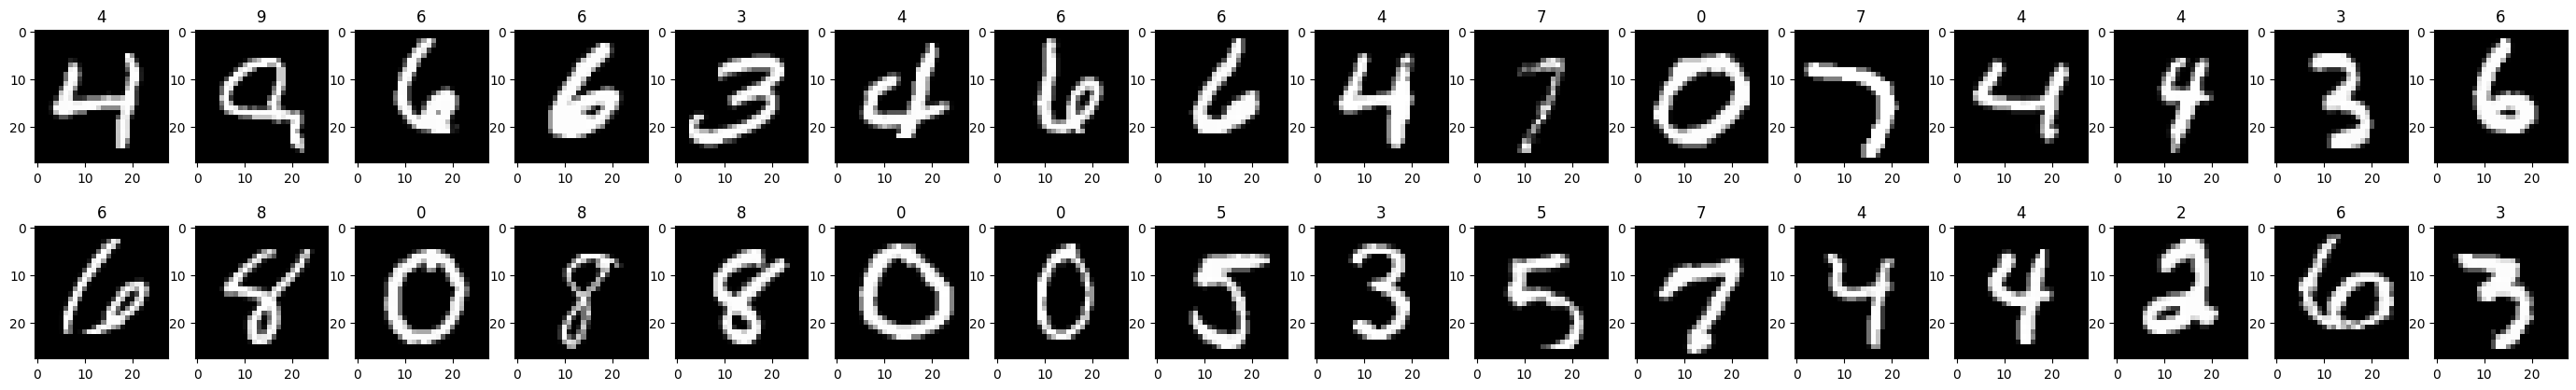

In [8]:
fig, axs = plt.subplots(nrows=2, ncols=16, figsize=(35,5))
count = 0
fig.subplots_adjust(hspace=0.2)

another_loader = get_loader('./data/mnist/mnist_test.csv')
for batch in another_loader:
    for x, y in zip(batch[0], batch[1]):
        axs.flat[count].imshow(x.reshape((28,28)), cmap='gray')
        axs.flat[count].set_title(int(y))
        count += 1
    break

---

## test model mnist

In [23]:
import torch
from torch import nn
from src.model.mnist_model import Mnist
from data.loader.mnist_loader import get_loader

In [19]:
# data
train_loader = get_loader('./data/mnist/mnist_train.csv')
test_loader = get_loader('./data/mnist/mnist_test.csv')

In [20]:
# device
device = torch.device('mps')
print(f'Using {device}')

Using mps


In [21]:
# model
model = Mnist().to(device)
print(model)

Mnist(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)


In [24]:
# opt
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-3
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [25]:
# train
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        
        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return loss

In [ ]:
# test
def test(dataloader, model):
    size = len(dataloader.dataset)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")